## Simulation of the Vibrational Spectrum

### Vehicle Passing in a Road
The pressure signal generated would be similar to a pulse with normal distribuition, where the intensity would be associated with the vehicle weight and the speed with the standard deviation.

In [2]:
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

%matplotlib inline

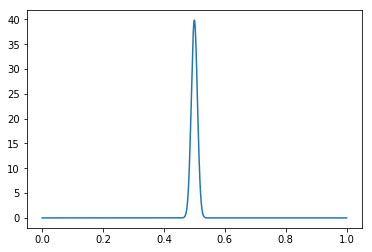

In [98]:
# Time vector
start, stop, N = 0, 1, 1000
T = (stop-start)/N
t = np.linspace(start, stop, N)
# Definition of the tire lenght in contact with the ground
tire_len = 0.1
velocity = 5 # m/s
contact_time = tire_len/velocity

# Pressure vector
m, std, intensity = stop/2, contact_time/2, 1
p_signal = norm(scale=std, loc=m).pdf(t)*intensity

# Pressure vector, two tires
tire_space = 3
tire_delay = tire_space/velocity
sec_p_signal = norm(scale=std, loc=m+tire_delay).pdf(t)*intensity
p_signal += sec_p_signal

# View time domain signal
plt.plot(t,p_signal)

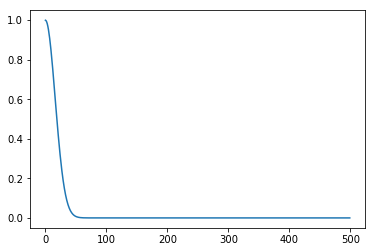

In [100]:
# get the frequency spectrum
p_spectrum = np.fft.fft(p_signal)

# get the frequency range
f = np.fft.fftfreq(N, T)

# view the fft signal
plt.plot(f[:N//2], 1/N*np.abs(p_spectrum)[:N//2])


array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

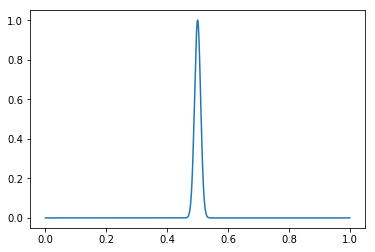

In [130]:

time_range = (0,1)
t = np.linspace(*time_range, 1000)
p = norm(scale=0.01, loc=m).pdf(t)
p /= max(p)
plt.plot(t,p)

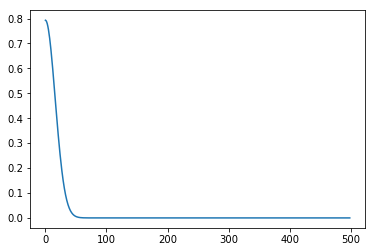

In [129]:
from models import *
from scipy.interpolate import UnivariateSpline

In [154]:
car = Vehicle(**{'tire_len':0.4, 'speed':20})
N = 10000
sensor = Sensor()
freq_response = sensor.frequency_response(N)


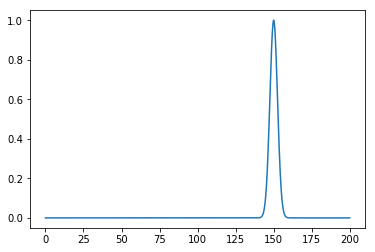

In [147]:
plt.plot(*freq_response)

55181.25


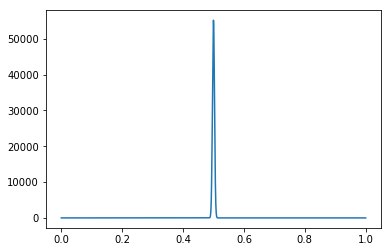

In [155]:
stress_curve = car.stress_vector(N, multiple_axis=False)
print(max(stress_curve[1]))
plt.plot(*stress_curve)

C:\Users\40000438\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


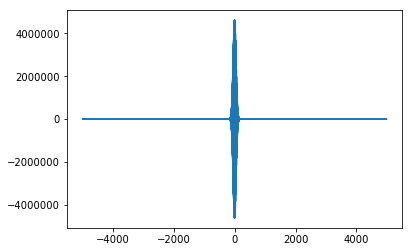

In [161]:
freq_curve = ViewUtils({'t':stress_curve[0],'p':stress_curve[1]}).convert_to_frequency('t','p')
N = len(stress_curve[0])
T = stress_curve[0][1] - stress_curve[0][0]
freq_curve = [np.fft.fftfreq(N, T)[:N//2], np.abs(1/N * np.fft.fft(stress_curve[1]))[:N//2]]
freq_curve = [np.fft.fftfreq(N, T), np.fft.fft(stress_curve[1])]
test = np.fft.ifft(freq_curve[1])
len(test)
# plt.plot(stress_curve[0], test)
plt.plot(*freq_curve)

In [ ]:
voltage = sensor.response(stress_curve)


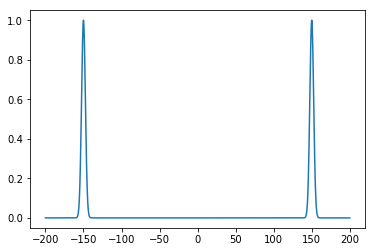

In [125]:
test = (np.flip(freq_response[0]*-1, 0), np.flip(freq_response[1], 0))
mirrored = (np.hstack((test[0], freq_response[0])), np.hstack((test[1], freq_response[1])))
plt.plot(*mirrored)